In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn import cross_validation
from sklearn.tree import DecisionTreeClassifier

C:\Users\llondono2\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
input_files = 'datos_arboles.txt'
datos = np.loadtxt(input_files, delimiter=",")
X,y = datos[:,:-1], datos[:,-1]

In [8]:
# Separamos los datos de acuredo a las etiquetas (2 clases)

clase0 = np.array(X[y==0])
clase1 = np.array(X[y==1])
clase2 = np.array(X[y==2])

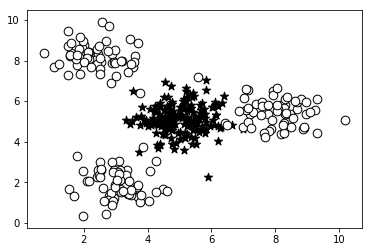

In [12]:
plt.figure()

plt.scatter(clase0[:,0], clase0[:,1], s=75, facecolors='black', edgecolor='black', linewidth=1, marker='*')

plt.scatter(clase1[:,0], clase1[:,1], s=75, facecolors='white', edgecolor='black', linewidth=1, marker='o')


plt.show()

In [14]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.25, random_state=5)

In [18]:
import matplotlib.pyplot as plt
import numpy as np

def visualizar_clasificador(clasificador, X, y):
    #definimos los máximos valores de X e y para la malla
    min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0 
    min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0
    #definimos el paso de la malla
    mesh_step_size = 0.01
    #definimos la malla para x e y
    x_vals, y_vals = np.mgrid[min_x:max_x:mesh_step_size, min_y:max_y:mesh_step_size]
    #corremos el clasificador sobre la malla
    resultados = clasificador.predict(np.c_[x_vals.ravel(), y_vals.ravel()])
    #reordenamos la salida
    print(resultados)
    resultados = resultados.reshape(x_vals.shape)
    #creamos la figura
    plt.figure()
    #elegimos los colores
    plt.pcolormesh(x_vals,y_vals,resultados,cmap=plt.cm.Paired)
    #ubicamos los puntos
    plt.scatter(X[:,0],X[:,1],c=y,s=75,edgecolors='black',linewidth=1,cmap=plt.cm.Paired)
    #especificamos los límites de la gráfica
    plt.xlim(x_vals.min(), x_vals.max()) 
    plt.ylim(y_vals.min(), y_vals.max())
    #especificamos los puntos que se visualizarán sobre los ejes
    plt.xticks((np.arange(int(X[:, 0].min() - 1), int(X[:, 0].max() + 1), 1.0))) 
    plt.yticks((np.arange(int(X[:, 1].min() - 1), int(X[:, 1].max() + 1), 1.0)))
    #Graficamos
    plt.show()

[ 1.  1.  1. ...,  1.  1.  1.]


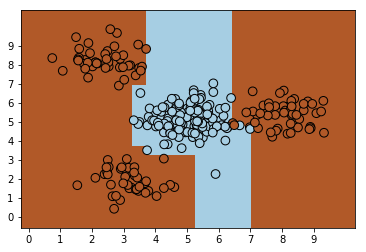

In [19]:
# construimos el clasificador creando una varibale tipo diccinario

# r_s semilla con la que arrancan 
# max_depth numero maximo de niveles que voy a tener
parametros = {'random_state':0, 'max_depth':4}


clasificador = DecisionTreeClassifier(**parametros)

clasificador.fit(X_train, y_train)

visualizar_clasificador(clasificador, X_train, y_train)

[ 1.  1.  1. ...,  1.  1.  1.]


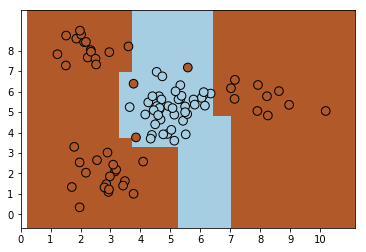

In [21]:
# Validamos con nuetro conjunto de test
y_test_pred = clasificador.predict(X_test)
visualizar_clasificador(clasificador, X_test, y_test)

In [33]:
nombres_clases = ['Clase 0', 'Clase 1']
print('\n'+'*'*60)
print('Desempeño del clasificador sobre el conjunto de entranamiento')
print(classification_report(y_train, clasificador.predict(X_train), target_names = nombres_clases))
print('\n'+'*'*60)

print('\n'+'*'*60)
print('Desempeño del clasificador sobre el conjunto de validacion')
print(classification_report(y_test, y_test_pred, target_names = nombres_clases))
print('\n'+'*'*60)


************************************************************
Desempeño del clasificador sobre el conjunto de entranamiento
             precision    recall  f1-score   support

    Clase 0       0.99      1.00      1.00       137
    Clase 1       1.00      0.99      1.00       133

avg / total       1.00      1.00      1.00       270


************************************************************

************************************************************
Desempeño del clasificador sobre el conjunto de validacion
             precision    recall  f1-score   support

    Clase 0       0.93      1.00      0.97        43
    Clase 1       1.00      0.94      0.97        47

avg / total       0.97      0.97      0.97        90


************************************************************
